<a href="https://colab.research.google.com/github/codingercat/Machine-Learning-Projects/blob/main/ProjectReport_CaseStudy1_Shambhavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1 Submission

**Name:**

Shambhavi Thakur

**Changes:**

Tried to improve the accuracy of the model by increasing number of epochs and changing the optimizer(from adam to RMSprop), but same accuracy was generated.

**Conclusion:**

The model has reached its limitation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
df = files.upload()

Saving sparcs1.csv to sparcs1 (2).csv


In [ ]:
sparcs = pd.read_csv('sparcs1.csv')
print(sparcs.columns)

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Age Group',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'CCS Procedure Description', 'APR Severity of Illness Code',
       'APR Risk of Mortality', 'Source of Payment 1', 'Total Costs'],
      dtype='object')


In [ ]:
sparcs.shape

(19999, 13)

In [ ]:
sparcs.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1,Total Costs
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company,"1,685.18"
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company,"17,394.94"
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross,"1,818.44"
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross,"1,024.48"
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay,"3,238.19"


In [ ]:
sparcs.describe()

,Operating Certificate Number,Facility ID,APR Severity of Illness Code
count,1.999400e+04,19994.000000,19999.000000
mean,6.968105e+06,1574.881414,1.382419
std,3.611114e+05,570.057810,0.669259
min,1.010000e+05,1.000000,0.000000
25%,7.002017e+06,1450.000000,1.000000
50%,7.002032e+06,1458.000000,1.000000
75%,7.002054e+06,1464.000000,2.000000
max,7.004010e+06,3975.000000,4.000000


In [ ]:
sparcs.drop(['Total Costs'], axis = 1, inplace = True)
sparcs.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,Manhattan,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,Manhattan,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,Manhattan,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,Tompkins,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,Bronx,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [ ]:
sparcs.drop(['Hospital County'], axis = 1, inplace = True)
sparcs.head()

,Health Service Area,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
0,New York City,7002054.0,1458.0,0 to 17,2,Newborn,Home or Self Care,CIRCUMCISION,1,Minor,Insurance Company
1,New York City,7002054.0,1458.0,0 to 17,4,Emergency,Cancer Center or Children's Hospital,RESP INTUB/MECH VENTIL,2,Major,Insurance Company
2,New York City,7002054.0,1464.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Blue Cross
3,Southern Tier,5401001.0,977.0,0 to 17,2,Newborn,Home or Self Care,PROPHYLACTIC VAC/INOCUL,2,Minor,Blue Cross
4,New York City,7000014.0,1176.0,0 to 17,3,Emergency,Home or Self Care,DIAGNOSTIC SPINAL TAP,2,Minor,Self-Pay


In [ ]:
sparcs.tail()

,Health Service Area,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1
19994,New York City,7002024.0,1456.0,0 to 17,4,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19995,New York City,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OTHER THERAPEUTIC PRCS,1,Minor,Blue Cross
19996,New York City,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19997,New York City,7002024.0,1456.0,0 to 17,2,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company
19998,New York City,7002024.0,1456.0,0 to 17,1,Newborn,Home or Self Care,OPHTHALM-/OT-OLOGIC DX,1,Minor,Insurance Company


In [ ]:
print("dimension of sparcs data: {}".format(sparcs.shape))

dimension of sparcs data: (19999, 11)


In [ ]:
sparcs.isnull().sum()

Health Service Area             5
Operating Certificate Number    5
Facility ID                     5
Age Group                       0
Length of Stay                  0
Type of Admission               0
Patient Disposition             4
CCS Procedure Description       0
APR Severity of Illness Code    0
APR Risk of Mortality           3
Source of Payment 1             0
dtype: int64

In [ ]:
sparcs = sparcs.dropna(subset=['Health Service Area', 'APR Risk of Mortality','Facility ID','Patient Disposition'])

In [ ]:
print(sparcs.groupby('APR Severity of Illness Code').size())

APR Severity of Illness Code
1    14192
2     4206
3     1327
4      262
dtype: int64


<Axes: ylabel='count'>

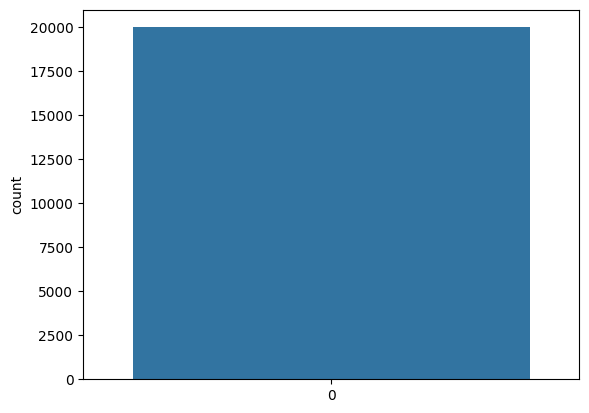

In [ ]:
import seaborn as sns

sns.countplot(sparcs['APR Severity of Illness Code'],label="Count")

In [ ]:
sparcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19987 entries, 0 to 19998
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Health Service Area           19987 non-null  object 
 1   Operating Certificate Number  19987 non-null  float64
 2   Facility ID                   19987 non-null  float64
 3   Age Group                     19987 non-null  object 
 4   Length of Stay                19987 non-null  object 
 5   Type of Admission             19987 non-null  object 
 6   Patient Disposition           19987 non-null  object 
 7   CCS Procedure Description     19987 non-null  object 
 8   APR Severity of Illness Code  19987 non-null  int64  
 9   APR Risk of Mortality         19987 non-null  object 
 10  Source of Payment 1           19987 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 2.3+ MB


In [ ]:
sparcs.apply(lambda cols : cols.unique() )

Health Service Area             [New York City, Southern Tier, Hudson Valley, ...
Operating Certificate Number    [7002054.0, 5401001.0, 7000014.0, 7001017.0, 7...
Facility ID                     [1458.0, 1464.0, 977.0, 1176.0, 1302.0, 1306.0...
Age Group                       [0 to 17, 18 to 29, 30 to 49, 70 or Older, 50 ...
Length of Stay                  [2, 4, 3, 15, 1, 35, 5, 8, 6, 16, 7, 23, 11, 2...
Type of Admission               [Newborn, Emergency, Elective, Urgent, Not Ava...
Patient Disposition             [Home or Self Care, Cancer Center or Children'...
CCS Procedure Description       [CIRCUMCISION, RESP INTUB/MECH VENTIL, OPHTHAL...
APR Severity of Illness Code                                         [1, 2, 3, 4]
APR Risk of Mortality                           [Minor, Major, Moderate, Extreme]
Source of Payment 1             [Insurance Company, Blue Cross, Self-Pay, Medi...
dtype: object

In [ ]:
sparcs[sparcs['Health Service Area']=='nan']

,Health Service Area,Operating Certificate Number,Facility ID,Age Group,Length of Stay,Type of Admission,Patient Disposition,CCS Procedure Description,APR Severity of Illness Code,APR Risk of Mortality,Source of Payment 1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Type of Admission"]=le.fit_transform(sparcs["Type of Admission"])

In [ ]:
(sparcs["Type of Admission"])

0        2
1        1
2        2
3        2
4        1
        ..
19994    2
19995    2
19996    2
19997    2
19998    2
Name: Type of Admission, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["CCS Procedure Description"]=le.fit_transform(sparcs["CCS Procedure Description"])

In [ ]:
sparcs["CCS Procedure Description"]

0         22
1        171
2         94
3        163
4         32
        ... 
19994     94
19995    154
19996     94
19997     94
19998     94
Name: CCS Procedure Description, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["APR Risk of Mortality"]=le.fit_transform(sparcs["APR Risk of Mortality"])

In [ ]:
sparcs["APR Risk of Mortality"]

0        2
1        1
2        2
3        2
4        2
        ..
19994    2
19995    2
19996    2
19997    2
19998    2
Name: APR Risk of Mortality, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Health Service Area"]=le.fit_transform(sparcs["Health Service Area"])

In [ ]:
sparcs["Health Service Area"]

0        4
1        4
2        4
3        5
4        4
        ..
19994    4
19995    4
19996    4
19997    4
19998    4
Name: Health Service Area, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Age Group"]=le.fit_transform(sparcs["Age Group"])

In [ ]:
sparcs["Age Group"]

0        0
1        0
2        0
3        0
4        0
        ..
19994    0
19995    0
19996    0
19997    0
19998    0
Name: Age Group, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Length of Stay"]=le.fit_transform(sparcs["Length of Stay"])

In [ ]:
sparcs["Length of Stay"]

0        20
1        42
2        20
3        20
4        31
         ..
19994    42
19995    20
19996    20
19997    20
19998     0
Name: Length of Stay, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Patient Disposition"]=le.fit_transform(sparcs["Patient Disposition"])

In [ ]:
sparcs["Patient Disposition"]

0        5
1        1
2        5
3        5
4        5
        ..
19994    5
19995    5
19996    5
19997    5
19998    5
Name: Patient Disposition, Length: 19987, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
sparcs["Source of Payment 1"]=le.fit_transform(sparcs["Source of Payment 1"])

In [ ]:
sparcs["Source of Payment 1"]

0        2
1        2
2        0
3        0
4        7
        ..
19994    2
19995    0
19996    2
19997    2
19998    2
Name: Source of Payment 1, Length: 19987, dtype: int64

In [ ]:
X = sparcs.drop(['Type of Admission'],axis = 1)
y = sparcs['Type of Admission']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state =42)
X_train.shape

(15989, 10)

In [ ]:
y_train.head()

16811    2
12671    1
842      1
6073     2
7768     2
Name: Type of Admission, dtype: int64

## LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred =logmodel.predict(X_test)

In [ ]:
y_pred[:20]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# calculate accuracy#
print("Training set accuracy: {:.3f}".format(logmodel.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logmodel.score(X_test, y_test)))

Training set accuracy: 0.638
Test set accuracy: 0.642


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[   0,    0,  248,    0,    0],
       [   0,    0, 1110,    0,    0],
       [   0,    0, 2567,    0,    0],
       [   0,    0,    1,    0,    0],
       [   0,    0,   72,    0,    0]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       248
           1       0.00      0.00      0.00      1110
           2       0.64      1.00      0.78      2567
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        72

    accuracy                           0.64      3998
   macro avg       0.13      0.20      0.16      3998
weighted avg       0.41      0.64      0.50      3998



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f\n"
     % mean_squared_error(y_test, y_pred))

Mean squared error: 0.60



In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.885


In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.714
Accuracy on test set: 0.710


## Features importance in Decision trees


In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.09528553 0.2982054  0.34915472 0.
 0.02096171 0.20877321 0.         0.02761942]


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.974
Accuracy on test set: 0.895


In [ ]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.718
Accuracy on test set: 0.710


## KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sparcs.loc[:, sparcs.columns != 'Type of Admission'], sparcs['Type of Admission'],
                                                    stratify=sparcs['Type of Admission'], random_state=66)

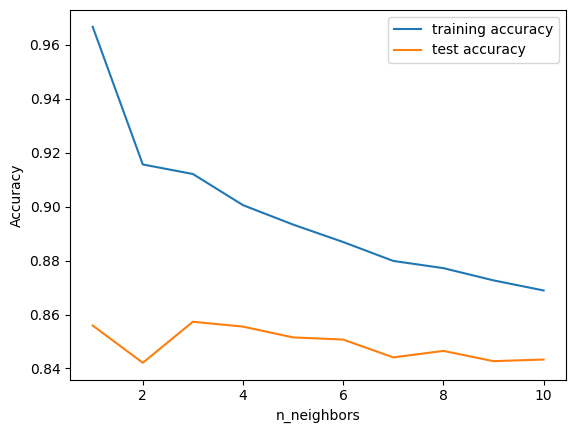

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

## SVM = Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.72
Accuracy on test set: 0.72


In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.765
Accuracy on test set: 0.702


## Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47, stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [ ]:
(X_train.shape,y_train.shape)

((15989, 10), (15989,))

In [ ]:
print(X_train)

[[0.66666667 0.99971665 0.36663312 ... 0.         0.66666667 0.        ]
 [0.66666667 0.99971346 0.3686462  ... 0.33333333 1.         0.25      ]
 [0.66666667 0.9997165  0.36789129 ... 0.         0.66666667 0.25      ]
 ...
 [0.66666667 0.99970897 0.3616004  ... 0.         0.66666667 0.25      ]
 [0.66666667 0.99971665 0.36663312 ... 0.33333333 0.66666667 0.        ]
 [0.66666667 0.99971418 0.36990438 ... 0.         0.66666667 0.25      ]]


In [ ]:
import tensorflow as tf
from keras.models import Sequential # It is linear stack of layers)
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
 #--------------> CHANGED THE OPTIMIZER<-------------------------
from keras.optimizers import RMSprop
opt = tf.keras.optimizers.RMSprop(learning_rate=0.08)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu', input_shape=(X_train.shape[1], )),   #
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 4)                 44        
                                                                 
 dense_36 (Dense)            (None, 1)                 5         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.variables

[<tf.Variable 'dense_35/kernel:0' shape=(10, 4) dtype=float32, numpy=
 array([[ 0.5808945 , -0.43321368,  0.13551176,  0.50122917],
        [-0.4336952 ,  0.21067488,  0.4985845 ,  0.57932484],
        [ 0.2626655 , -0.01893753, -0.4022903 ,  0.608444  ],
        [ 0.32455546,  0.10434973,  0.2653147 ,  0.2259261 ],
        [-0.39889243, -0.52918434,  0.5687585 ,  0.34960544],
        [ 0.4493481 ,  0.31551987,  0.24472737, -0.35073236],
        [ 0.24954748,  0.6417061 ,  0.5810528 , -0.25249475],
        [-0.54702836,  0.5083879 , -0.62204367, -0.1834118 ],
        [-0.10068572,  0.49545765,  0.36997128, -0.0302583 ],
        [ 0.60936415, -0.14616698,  0.25999576,  0.02863628]],
       dtype=float32)>,
 <tf.Variable 'dense_35/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_36/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 1.0102484 ],
        [-0.8318068 ],
        [ 0.10475397],
        [ 0.21055913]], dtype=float32)>,
 

In [ ]:
# Compiling the ANN
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) --------> ORIGINAL CODE
model.compile(optimizer = opt ,loss = "categorical_crossentropy" , metrics=['accuracy'])    #---------> UPDATED CODE

In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 4/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 5/50
500/500 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2728 - val_loss: 0.0000e+00 - val_accuracy: 0.2729
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2

In [ ]:
#now testing for Test data
y_pred = model.predict(X_test)

125/125 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
#converting values
y_pred = (y_pred>0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
